# Energy production from 1970 to 2010

We investigate the energy production data provided by 

https://www.gapminder.org/data/

********************
To answer the following questions:

What were the tendencies in the energy production in from 1970 to 2010?

How is the energy production distribution around the world in this period?

Do energy production other than  oil, gas, nuclear played an important role?
********************

## Data


**Energy production, total**

Description: Energy production refers to forms of primary energy petroleum (crude oil, natural gas liquids, and 
Oil from nonconventional sources), natural gas, solid fuels (coal, lignite and other derived fuels), and combustible 
renewables and waste— and primary electricity, all converted into tonnes of oil equivalents, counted in tonnes 
of oil equivalent (thousand of tonnes oil equivalent).

https://data.worldbank.org/indicator/EG.EGY.PROD.KT.OE

**Oil production, total**

Description: Total amount of crude oil production (tonnes oil equivalent)

https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy.html


**Natural gas production, total**

Description: Natural gas production (tonnes oil equivalent)

https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy.html

**Hydro electricity production, total**

Description: The amount of hydro power generated during the given year, counted in tonnes of oil equivalent (tonnes oil equivalent)

https://data.worldbank.org/indicator/EG.ELC.HYRO.KH

**Nuclear electricity production, total**

Description: The amount of electricity produced by nuclear power plants in a given year, counted in tonnes of oil equivalent (toe)

https://data.worldbank.org/indicator/EG.ELC.NUCL.KH



## Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df_total = pd.read_csv('energy_production_total.csv', index_col='country')*1000 # The 1000 unit conversion into toe (tonnes of oil equivalent)
df_oil = pd.read_csv('oil_production_total.csv', index_col='country')
df_gas = pd.read_csv('natural_gas_production_total.csv', index_col='country')
#df_hydro = pd.read_csv('hydro_power_generation_total.csv', index_col='country')
#df_nuclear = pd.read_csv('nuclear_power_generation_total.csv', index_col='country')

In [3]:
# All notebooks follow this pattern, missing values correspont to early years and year 2010.
df_total.head(2)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,,,,,,
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,883000.0,959000.0,1050000.0,1150000.0,1170000.0,1190000.0,1060000.0,1150000.0,1250000.0,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,137000000.0,143000000.0,155000000.0,158000000.0,167000000.0,165000000.0,164000000.0,162000000.0,152000000.0,NaN


### Inspecting missing values

In [4]:
# Most total energy data has only 7 missing values
frame=df_total
frame.isnull().sum(axis=1).describe(), frame.columns[0], frame.columns[-1]

(count    133.000000
 mean      13.593985
 std       10.249196
 min        0.000000
 25%       12.000000
 50%       12.000000
 75%       12.000000
 max       43.000000
 dtype: float64, '1960', '2010')

In [5]:
# Most gas energy data has only 6 missing values
frame=df_gas
frame.isnull().sum(axis=1).describe(), frame.columns[0], frame.columns[-1]

(count    49.000000
 mean      3.857143
 std       7.547074
 min       0.000000
 25%       0.000000
 50%       0.000000
 75%       6.000000
 max      39.000000
 dtype: float64, '1970', '2016')

In [6]:
# Most oil energy data has only 7 missing values
frame=df_oil
frame.isnull().sum(axis=1).describe(), frame.columns[0], frame.columns[-1]

(count    49.000000
 mean      6.489796
 std      11.530977
 min       0.000000
 25%       0.000000
 50%       0.000000
 75%       7.000000
 max      47.000000
 dtype: float64, '1965', '2016')

**Insights:**

1. All data frame have data from 1965 till 2010
2. Most missing data (>75%) occurs before 1972

### Wrangling and handling missing values

In [7]:
# In view of the above observations we are going to focus on studying the following values
bin_edges = [1974+3*i for i in range(13)]
bin_names = [str(i)[-2:]+'-'+str(i+2)[-2:] for i in bin_edges[:-1]]
bin_names

['74-76',
 '77-79',
 '80-82',
 '83-85',
 '86-88',
 '89-91',
 '92-94',
 '95-97',
 '98-00',
 '01-03',
 '04-06',
 '07-09']

In [8]:
def wrangle_handle_missing(df):
    
    aux = df.rename(columns=lambda x: int(x)) # numeric column names    
    aux=aux.T # exchange rows and columns
    aux=aux.rename(columns=lambda x: x.strip().lower().replace(" ", "_")) #uniform names convention
    
    aux = aux.reset_index().rename(columns = {'index': 'year'}) # reset index, rename year
    aux['period'] = pd.cut(aux['year'], bin_edges, labels=bin_names) # create bin years
    aux=aux.groupby('period').sum().drop(columns=['year']) # group by energy on bin years    
    if aux.isnull().sum().sum() != 0: print('There are missing values') #check there are not NaNs
        
    return aux

In [9]:
df_total = wrangle_handle_missing(df_total)
df_oil = wrangle_handle_missing(df_oil)
df_gas = wrangle_handle_missing(df_gas)

In [10]:
cols = df_total.sum(0).sort_values(ascending=False).index # Countries order according to total production

df_total = df_total.reindex(cols, axis=1) # Sort columns according to cols list
df_oil = df_oil.reindex(cols, axis=1) # Sort columns according to cols list
df_gas = df_gas.reindex(cols, axis=1) # Sort columns according to cols list

In [11]:
# Some countries were funded recently, hence their missing values appear before 1990ish
df_total.head(6)

country,united_states,china,russia,saudi_arabia,canada,india,iran,united_kingdom,mexico,indonesia,...,armenia,eritrea,lebanon,jordan,namibia,luxembourg,moldova,cyprus,singapore,malta
period,,,,,,,,,,,,,,,,,,,,,
74-76,4.280000e+09,1.565000e+09,0.000000e+00,1.284000e+09,560000000.0,510000000.0,899000000.0,397000000.0,210100000.0,318300000.0,...,0.0,0.0,534000.0,2794.0,0.0,34370.0,0.0,22120.0,0.0,0.0
77-79,4.550000e+09,1.839000e+09,0.000000e+00,1.468000e+09,608000000.0,546000000.0,529800000.0,558000000.0,356000000.0,368000000.0,...,0.0,0.0,534000.0,2079.0,0.0,79700.0,0.0,22840.0,0.0,0.0
80-82,4.550000e+09,1.919000e+09,0.000000e+00,1.176000e+09,611000000.0,633000000.0,342400000.0,662000000.0,560000000.0,361000000.0,...,0.0,0.0,489000.0,3032.0,0.0,87400.0,0.0,17820.0,0.0,0.0
83-85,4.720000e+09,2.224000e+09,0.000000e+00,7.510000e+08,710000000.0,723000000.0,345000000.0,690000000.0,570000000.0,401000000.0,...,0.0,0.0,463000.0,19040.0,0.0,87700.0,0.0,20080.0,0.0,0.0
86-88,4.830000e+09,2.462000e+09,0.000000e+00,8.470000e+08,800000000.0,814000000.0,414000000.0,685000000.0,572000000.0,426000000.0,...,0.0,0.0,464000.0,98200.0,0.0,105400.0,0.0,18540.0,0.0,0.0
89-91,4.940000e+09,2.693000e+09,3.650000e+09,1.316000e+09,853000000.0,900000000.0,577000000.0,638000000.0,599000000.0,540000000.0,...,535000.0,708000.0,461000.0,492000.0,429000.0,104900.0,181800.0,17170.0,0.0,0.0


In [12]:
def handling_new_countries(df_0):  
    df= df_0[df_0!=0] # replacing 0's with NaNs
    for i in df.columns:
        aux = df[i].min() 
        df[i].fillna(aux, inplace=True) # replacing NaNs with country min
    return df

In [13]:
df_total = handling_new_countries(df_total)
df_oil = handling_new_countries(df_oil)
df_gas = handling_new_countries(df_gas)

In [14]:
df_oil.head()

country,united_states,china,russia,saudi_arabia,canada,india,iran,united_kingdom,mexico,indonesia,...,armenia,eritrea,lebanon,jordan,namibia,luxembourg,moldova,cyprus,singapore,malta
period,,,,,,,,,,,,,,,,,,,,,
74-76,1.391000e+09,257900000.0,9.140000e+08,1.264000e+09,232500000.0,27140000.0,852000000.0,52070000.0,139400000.0,226900000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77-79,1.441000e+09,316000000.0,9.140000e+08,1.422000e+09,244800000.0,33500000.0,499200000.0,212400000.0,254400000.0,240600000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80-82,1.443000e+09,309000000.0,9.140000e+08,1.086000e+09,228600000.0,60300000.0,309200000.0,307500000.0,426000000.0,217300000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83-85,1.477000e+09,371000000.0,1.103000e+09,6.440000e+08,255200000.0,90000000.0,316000000.0,381000000.0,431000000.0,211600000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86-88,1.355000e+09,409000000.0,1.690000e+09,7.690000e+08,278000000.0,97400000.0,378000000.0,328700000.0,429000000.0,208700000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Merging

In [15]:
aux=df_total 
aux['energy_source']= ['total']* len(aux)
df_total=aux.set_index('energy_source',append=True)

In [16]:
aux=df_oil
aux['energy_source']= ['oil']* len(aux)
df_oil=aux.set_index('energy_source',append=True)

In [17]:
aux=df_gas
aux['energy_source']= ['gas']* len(aux)
df_gas=aux.set_index('energy_source',append=True)

In [18]:
df_total = df_total.reset_index().set_index(['energy_source','period'],  drop=True) 
df_oil = df_oil.reset_index().set_index(['energy_source','period'],  drop=True) 
df_gas = df_gas.reset_index().set_index(['energy_source','period'],  drop=True) 

In [19]:
df = df_total.append([df_oil,df_gas])

In [20]:
#Example of handling
df.united_kingdom.loc[('total')]

period
74-76    397000000.0
77-79    558000000.0
80-82    662000000.0
83-85    690000000.0
86-88    685000000.0
89-91    638000000.0
92-94    726000000.0
95-97    809000000.0
98-00    817000000.0
01-03    731000000.0
04-06    569000000.0
07-09    476000000.0
Name: united_kingdom, dtype: float64

# Analysis

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

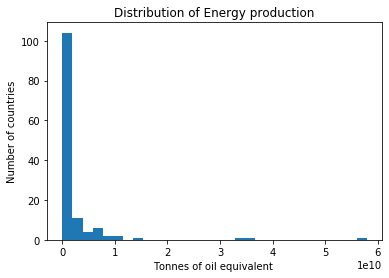

In [22]:
plt.hist(df.loc[('total')].sum(axis=0) , bins= 30);
plt.title("Distribution of Energy production")
plt.xlabel("Tonnes of oil equivalent ")
plt.ylabel("Number of countries");

In [23]:
# Total energy percentage produced by each country
total_percentage = (df.loc[('total')].sum(axis=0)/ df.loc[('total')].sum(axis=0).sum()*100)

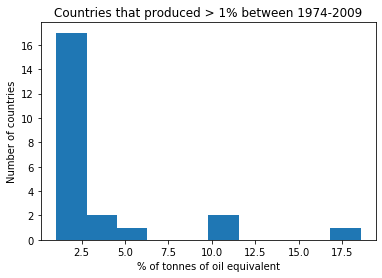

In [24]:
plt.hist(total_percentage[total_percentage>1] , bins= 10);
plt.title("Countries that produced > 1% between 1974-2009")
plt.xlabel("% of tonnes of oil equivalent")
plt.ylabel("Number of countries");

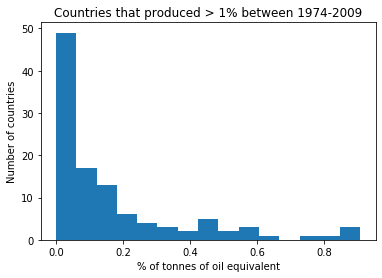

In [25]:
plt.hist(total_percentage[total_percentage<1] , bins= 15);
plt.title("Countries that produced > 1% between 1974-2009")
plt.xlabel("% of tonnes of oil equivalent")
plt.ylabel("Number of countries");

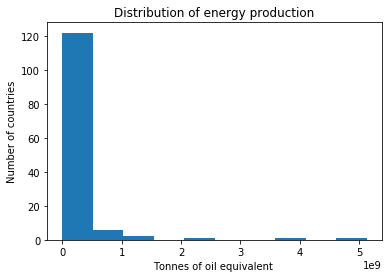

In [26]:
# Let us look at the period 2007-2009
plt.hist(df.loc[('total','07-09')] , bins= 10);
plt.title("Distribution of energy production")
plt.xlabel("Tonnes of oil equivalent ")
plt.ylabel("Number of countries");

**Tentative conclusion: 
The vast majority of countries only produce less that 1e7 toe** 

**Top five countries that produced more energy**

In [27]:
#Between 1974-1976
df.loc[('total', '74-76')].sort_values(ascending = False)[:5]

country
united_states    4.280000e+09
russia           2.430000e+09
china            1.565000e+09
saudi_arabia     1.284000e+09
iran             8.990000e+08
Name: (total, 74-76), dtype: float64

In [28]:
#Between 1998-2000
df.loc[('total', '98-00')].sort_values(ascending = False)[:5]

country
united_states    5.030000e+09
china            3.210000e+09
russia           2.950000e+09
saudi_arabia     1.394000e+09
canada           1.114000e+09
Name: (total, 98-00), dtype: float64

In [29]:
#Between 2007-2009
df.loc[('total', '07-09')].sort_values(ascending = False)[:5]

country
united_states    5.130000e+09
china            4.080000e+09
russia           2.430000e+09
canada           1.192000e+09
saudi_arabia     1.107000e+09
Name: (total, 07-09), dtype: float64

In [30]:
df.loc[('total', '07-09')].sort_values(ascending = False).describe()

count    1.330000e+02
mean     2.130514e+08
std      6.244945e+08
min      1.977000e+03
25%      8.060000e+06
50%      3.380000e+07
75%      1.582000e+08
max      5.130000e+09
Name: (total, 07-09), dtype: float64

### Oil and gas

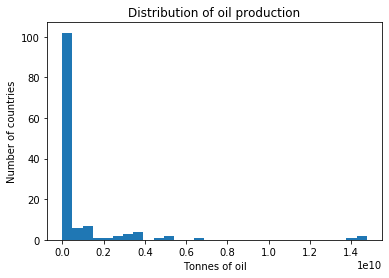

In [31]:
plt.hist(df.loc[('oil')].sum(axis=0) , bins= 30);
plt.title("Distribution of oil production")
plt.xlabel("Tonnes of oil")
plt.ylabel("Number of countries");

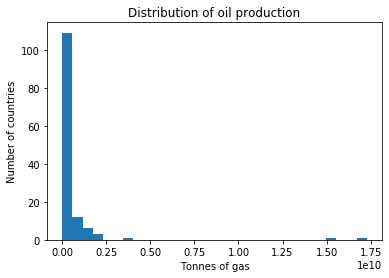

In [32]:
plt.hist(df.loc[('gas')].sum(axis=0) , bins= 30);
plt.title("Distribution of oil production")
plt.xlabel("Tonnes of gas")
plt.ylabel("Number of countries");

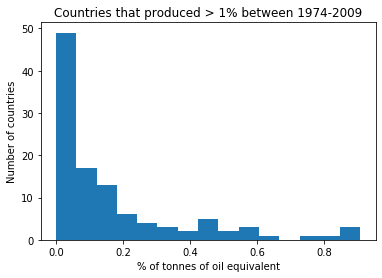

In [33]:
plt.hist(total_percentage[total_percentage<1] , bins= 15);
plt.title("Countries that produced > 1% between 1974-2009")
plt.xlabel("% of tonnes of oil equivalent")
plt.ylabel("Number of countries");

In [34]:
# Total gas energy percentage produced by each country
total_percentage = (df.loc[('oil')].sum(axis=0)/ df.loc[('oil')].sum(axis=0).sum()*100)

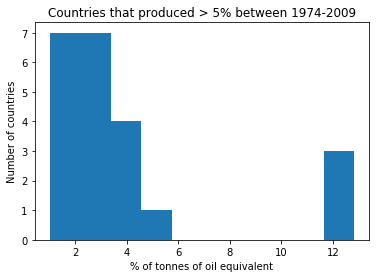

In [35]:
plt.hist(total_percentage[total_percentage>1] , bins= 10);
plt.title("Countries that produced > 5% between 1974-2009")
plt.xlabel("% of tonnes of oil equivalent")
plt.ylabel("Number of countries");

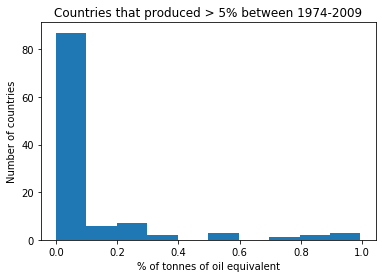

In [36]:
plt.hist(total_percentage[total_percentage<1] , bins= 10);
plt.title("Countries that produced > 5% between 1974-2009")
plt.xlabel("% of tonnes of oil equivalent")
plt.ylabel("Number of countries");

# Non-fosil energy production  in the USA

In [59]:
us_nonfosil = df.united_states['total']  -  df.united_states['oil'] - df.united_states['gas'] 

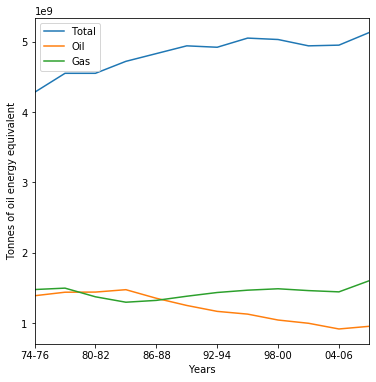

In [93]:
fig, ax = plt.subplots(figsize=(6, 6))
df.united_states['total'].plot()
df.united_states['oil'].plot()
df.united_states['gas'].plot()
ax.legend([ "Total","Oil","Gas"]);
plt.xlabel("Years")
plt.ylabel("Tonnes of oil energy equivalent");

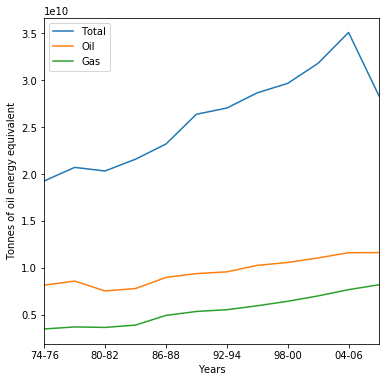

In [92]:
fig, ax = plt.subplots(figsize=(6, 6))
df.sum(axis=1)['total'].plot()
df.sum(axis=1)['oil'].plot()
df.sum(axis=1)['gas'].plot()
ax.legend([ "Total","Oil","Gas"]);
plt.xlabel("Years")
plt.ylabel("Tonnes of oil energy equivalent");